In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns

In [2]:
df=pd.read_csv("sugarcane.csv")
df.head(10)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
5,5,Mexico,North America,56.446.821,452524,781.054,72.27
6,6,Colombia,South America,36.951.213,740075,416.626,"88.691,5"
7,7,Australia,Oceania,34.403.004,"1.373,406",447.204,"76.929,1"
8,8,Guatemala,North America,33.533.403,"1.938,114",259.85,"129.049,3"
9,9,United States of America,North America,29.926.210,91304,370.53,80.766


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [4]:
imputer=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")
imputer.fit(df.iloc[:,5:7].values)
df.iloc[:,5:7]=imputer.transform(df.iloc[:,5:7].values)
print(df)

     Unnamed: 0    Country      Continent Production (Tons)  \
0             0     Brazil  South America       768.678.382   
1             1      India           Asia       348.448.000   
2             2      China           Asia       123.059.739   
3             3   Thailand           Asia        87.468.496   
4             4   Pakistan           Asia        65.450.704   
..          ...        ...            ...               ...   
98           98    Lebanon           Asia                97   
99           99   Djibouti         Africa                53   
100         100  Singapore           Asia                50   
101         101      Samoa        Oceania                12   
102         102      Syria           Asia                 1   

    Production per Person (Kg) Acreage (Hectare) Yield (Kg / Hectare)  
0                    3.668,531        10.226.205             75.167,5  
1                       260721         4.950.000             70.393,5  
2                        88

In [5]:
df["Production (Tons)"]=df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(".","")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(",",".")
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].str.replace(".","")
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].str.replace(",",".")
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].str.replace(",",".")

df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [6]:
df=df.drop("Unnamed: 0", axis=1)
df.head()


,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [7]:
df["Production (Tons)"]=df["Production (Tons)"].astype(float)
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].astype(float)
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].astype(float)
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     103 non-null    object 
 1   Continent                   103 non-null    object 
 2   Production (Tons)           103 non-null    float64
 3   Production per Person (Kg)  103 non-null    float64
 4   Acreage (Hectare)           103 non-null    float64
 5   Yield (Kg / Hectare)        103 non-null    float64
dtypes: float64(4), object(2)
memory usage: 5.0+ KB


### univariate analysis

#### 1. How many countries produce sugarcane from each continent?

In [8]:
Africa=len(df[df["Continent"]=="Africa"].value_counts())
print("Africa=",Africa)
Asia=len(df[df["Continent"]=="Asia"].value_counts())
print("Asia=",Asia)
Europe=len(df[df["Continent"]=="Europe"].value_counts())
print("Europe=",Europe)
SouthAmerica=len(df[df["Continent"]=="South America"].value_counts())
print("South America=",SouthAmerica)
NorthAmerica=len(df[df["Continent"]=="North America"].value_counts())
print("North America=",NorthAmerica)
Oceania=len(df[df["Continent"]=="Oceania"].value_counts())
print("Oceania=",Oceania)

Africa= 39
Asia= 25
Europe= 2
South America= 11
North America= 22
Oceania= 4


In [62]:
df["Continent"].value_counts()


Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

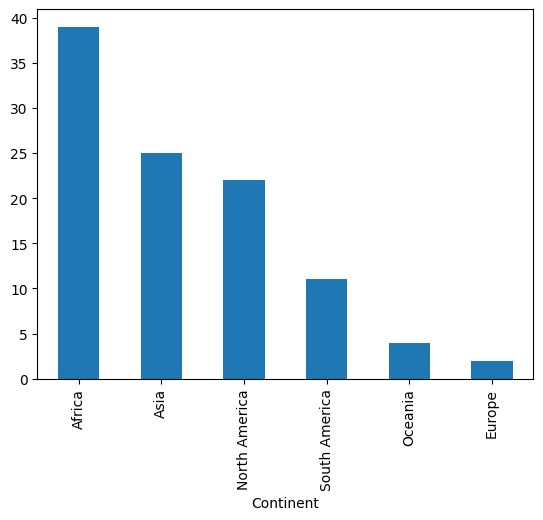

In [63]:
df["Continent"].value_counts().plot(kind="bar")

#### Africa= 38 Asia= 25 Europe= 2 South America= 11 North America= 22 Oceania= 4 

#### 2. Are there outliers? Why could this be?

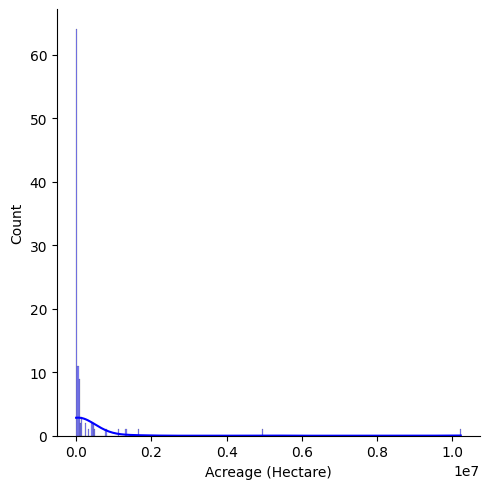

In [9]:
sns.displot(df["Acreage (Hectare)"],kde=True,color="blue")

<Axes: ylabel='Acreage (Hectare)'>

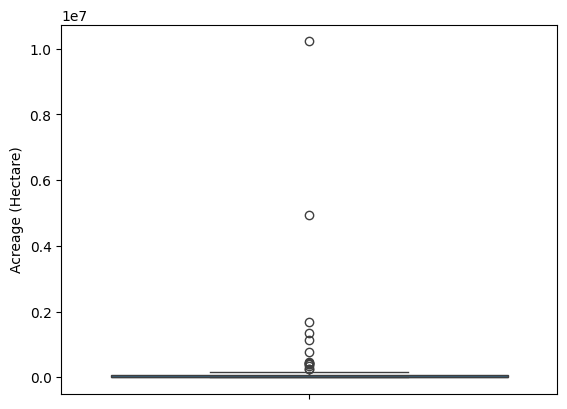

In [64]:
sns.boxplot(df["Acreage (Hectare)"])

<Axes: ylabel='Yield (Kg / Hectare)'>

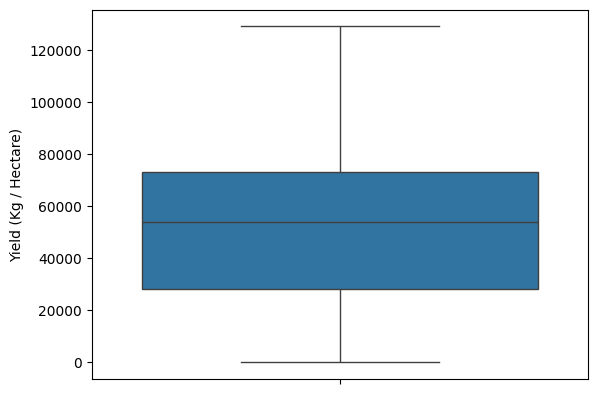

In [66]:
sns.boxplot(df["Yield (Kg / Hectare)"])

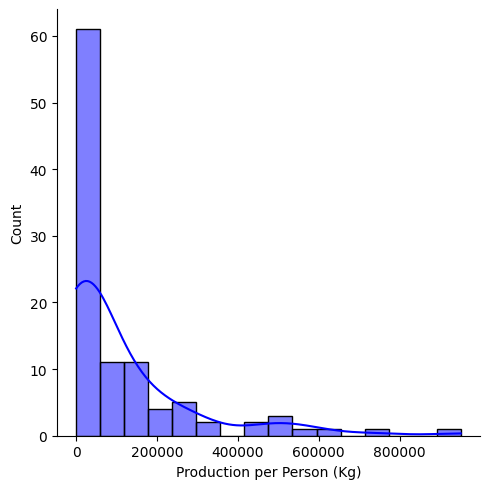

In [10]:
sns.displot(df["Production per Person (Kg)"],kde=True,color="blue")

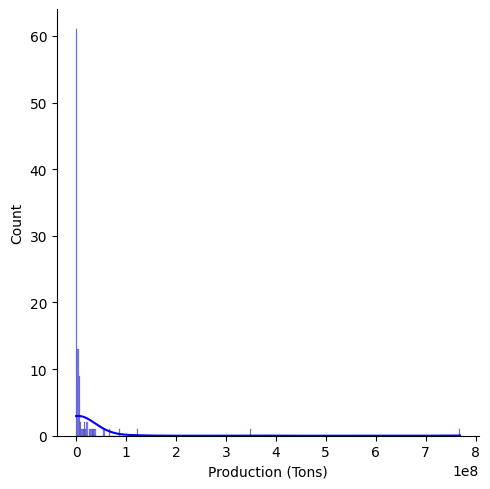

In [11]:
sns.displot(df["Production (Tons)"],kde=True,color="blue")

<Axes: ylabel='Production (Tons)'>

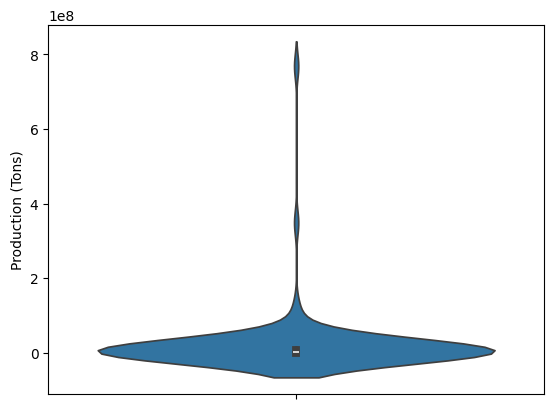

In [67]:
sns.violinplot(df["Production (Tons)"])

#### There are lots of country (about 60) that does not produce sugarcane. This might cause a problem when it comes to doing mathematical calculations because it will make our data skew to 0 than it is supposed to be.

### Bivariate Analysis

#### 1. Which countries produces the maximum sugarcane?

In [12]:
maxsugarcane=0
for column in df["Production (Tons)"]:
    if column >maxsugarcane:
        maxsugarcane=column
dfad=df[df["Production (Tons)"]==maxsugarcane]
print(dfad["Country"])

0    Brazil
Name: Country, dtype: object


In [68]:
df[["Country","Production (Tons)"]].set_index("Country")

,Production (Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Lebanon,97.0
Djibouti,53.0
Singapore,50.0


#### India produces the maximum sugarcane

#### 2. Which country has the highest land?

In [13]:
maxland=0
for column in df["Acreage (Hectare)"]:
    if column >maxland:
        maxland=column
dfad=df[df["Acreage (Hectare)"]==maxland]
print(dfad["Country"])

0    Brazil
Name: Country, dtype: object


In [70]:
df.sort_values("Acreage (Hectare)",ascending=False)

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...
98,Lebanon,Asia,97.0,16.000,3.0,28386.4
100,Singapore,Asia,50.0,9.000,2.0,25.0
101,Samoa,Oceania,12.0,6.000,1.0,11949.8
99,Djibouti,Africa,53.0,51.000,0.0,10.0


#### Brazil has the highest land

#### 3. Which country has the highest yield per hectare?

In [14]:
df.head(10)

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
5,Mexico,North America,56446821.0,452524.000,781054.0,7227.0
6,Colombia,South America,36951213.0,740075.000,416626.0,88691.5
7,Australia,Oceania,34403004.0,1373.406,447204.0,76929.1
8,Guatemala,North America,33533403.0,1938.114,25985.0,129049.3
9,United States of America,North America,29926210.0,91304.000,37053.0,80766.0


In [15]:
maxYield=0
for column in df["Yield (Kg / Hectare)"]:
    if column >maxYield:
        maxYield=column
dfad=df[df["Yield (Kg / Hectare)"]==maxYield]
print(dfad["Country"])

8    Guatemala
Name: Country, dtype: object


In [71]:
df.sort_values("Yield (Kg / Hectare)",ascending=False)

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
8,Guatemala,North America,33533403.0,1938.114,25985.0,129049.3
57,Senegal,Africa,696992.0,44321.000,5902.0,118085.3
15,Egypt,Africa,15760418.0,161651.000,137011.0,115030.6
18,Peru,South America,9832526.0,314768.000,87696.0,112120.2
40,Malawi,Africa,2915406.0,162584.000,27087.0,107629.5
...,...,...,...,...,...,...
55,Trinidad and Tobago,North America,810.0,597066.000,15.0,54.0
100,Singapore,Asia,50.0,9.000,2.0,25.0
87,Iraq,Asia,1167.0,297.000,584.0,20.0
96,Yemen,Asia,500.0,17.000,50.0,10.0


#### Guatemala has the highest yield rate

#### 4. Which country has the highest production?

In [16]:
maxppp=0
for column in df["Production per Person (Kg)"]:
    if column >maxppp:
        maxppp=column
dfad=df[df["Production per Person (Kg)"]==maxppp]
print(dfad["Country"])

25    Paraguay
Name: Country, dtype: object


In [72]:
df.sort_values("Production per Person (Kg)",ascending=False)

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
25,Paraguay,South America,6708000.0,951087.0,120.0,559.0
6,Colombia,South America,36951213.0,740075.0,416626.0,88691.5
55,Trinidad and Tobago,North America,810.0,597066.0,15.0,54.0
42,Panama,North America,2419638.0,581814.0,37995.0,63683.1
51,Jamaica,North America,1422432.0,521254.0,26255.0,54178.2
...,...,...,...,...,...,...
98,Lebanon,Asia,97.0,16.0,3.0,28386.4
100,Singapore,Asia,50.0,9.0,2.0,25.0
97,Spain,Europe,394.0,8.0,9.0,43596.5
101,Samoa,Oceania,12.0,6.0,1.0,11949.8


#### Paraguay has the highest production per person

#### 5. What is the correlation between the variables (columns)?

<Axes: >

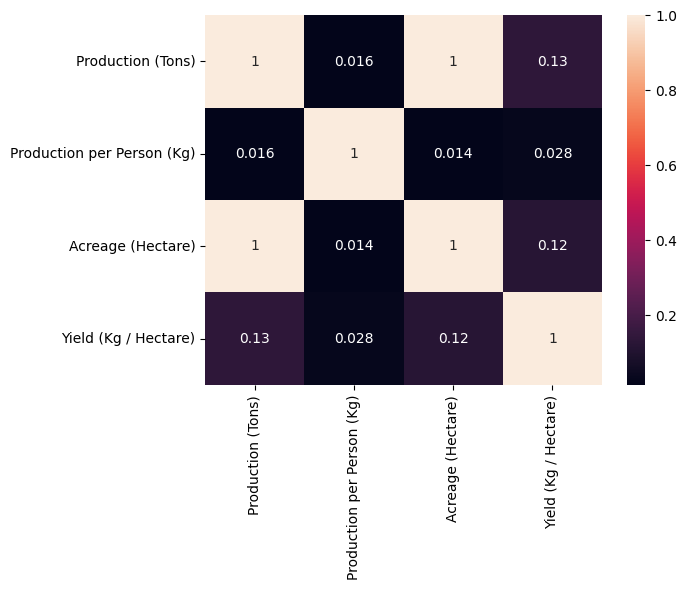

In [73]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

#### 6. Do countries with higher land produce more sugarcane?

<Axes: xlabel='Acreage (Hectare)', ylabel='Production (Tons)'>

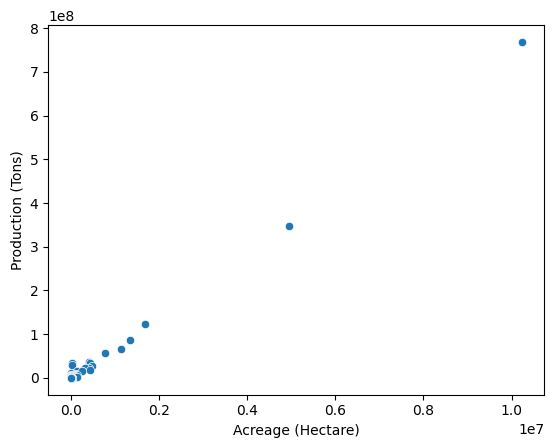

In [78]:
sns.scatterplot(x="Acreage (Hectare)",y="Production (Tons)",data=df)

##### Yes. Since the country has more land to produce sugarcane, the country is able to produce more sugarcane.

#### 7. Do countries which yield more sugarcane per hectare produce more sugarcane in total?

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Production (Tons)'>

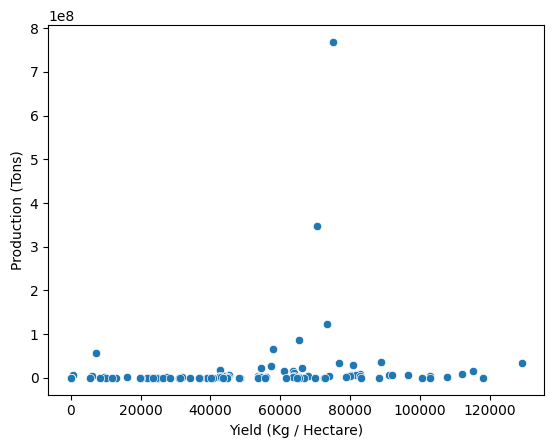

In [79]:
sns.scatterplot(x="Yield (Kg / Hectare)",y="Production (Tons)",data=df)

##### No. The yield rate shows the efficiency of the sugarcane production not the amount of the sugarcane production.

#### Analysis by Continent

#### 1. Which continent produces the maximum sugarcane?

In [45]:
Asiatotal=df[df["Continent"]=="Asia"]["Production (Tons)"].sum()
print("Asia : ",Asiatotal)
Europetotal=df[df["Continent"]=="Europe"]["Production (Tons)"].sum()
print("Europe : ",Europetotal)
SoAmtotal=df[df["Continent"]=="South America"]["Production (Tons)"].sum()
print("South America : ",SoAmtotal)
NoAmtotal=df[df["Continent"]=="North America"]["Production (Tons)"].sum()
print("North America : ",NoAmtotal)
Oceaniatotal=df[df["Continent"]=="Oceania"]["Production (Tons)"].sum()
print("Oceania : ",Oceaniatotal)
Africatotal=df[df["Continent"]=="Africa"]["Production (Tons)"].sum()
print("Africa : ",Africatotal)

Asia :  721930425.0
Europe :  5823.0
South America :  865588126.0
North America :  173995947.0
Oceania :  36177574.0
Africa :  <class 'numpy.float64'>


In [83]:
df[["Continent","Production (Tons)"]].set_index("Continent")

,Production (Tons)
Continent,
South America,768678382.0
Asia,348448000.0
Asia,123059739.0
Asia,87468496.0
Asia,65450704.0
...,...
Asia,97.0
Africa,53.0
Asia,50.0


<Axes: xlabel='Continent', ylabel='Production (Tons)'>

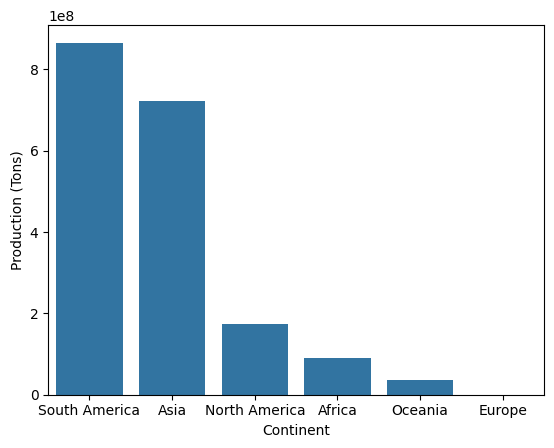

In [90]:
dfc=df.groupby("Continent").sum()
sns.barplot(dfc["Production (Tons)"].sort_values(ascending=False))

#### 2. Do the number of countries in a continent affect the production of sugarcane?

In [35]:
NumofConAsia=df[df["Continent"]=="Asia"]["Country"].count()
NumofConEurope=df[df["Continent"]=="Europe"]["Country"].count()
NumofConNorthAm=df[df["Continent"]=="North America"]["Country"].count()
NumofConSouthAm=df[df["Continent"]=="South America"]["Country"].count()
NumofConAfrica=df[df["Continent"]=="Africa"]["Country"].count()
NumofConOceania=df[df["Continent"]=="Oceania"]["Country"].count()
print("Asia: ",NumofConAsia,"\n"
      "Europe: ",NumofConEurope,"\n"
      "North America: ", NumofConNorthAm,"\n"
      "South America: ",NumofConSouthAm,"\n"
      "Africa: ",NumofConAfrica,"\n"
      "Oceania: ",NumofConOceania,"\n")
sns.jointplot(x="",y="Production (Tons)",data=df,kind="reg")

Asia:  25 
Europe:  2 
North America:  22 
South America:  11 
Africa:  39 
Oceania:  4 



<Axes: xlabel='NOC', ylabel='Production (Tons)'>

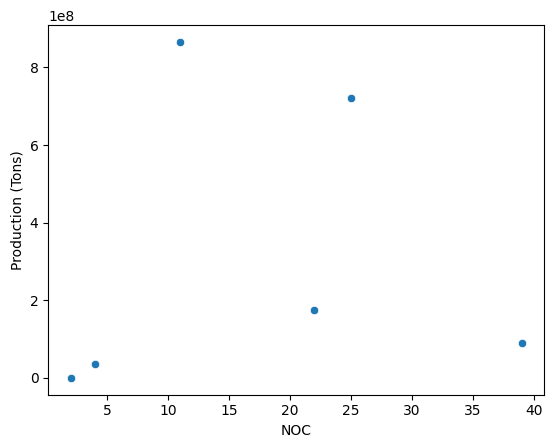

In [96]:
dfnc=df.groupby("Continent").sum()
dfnc["NOC"]=df.groupby("Continent").count()["Country"]
sns.scatterplot(data=dfnc,x="NOC",y="Production (Tons)")

#### From the data above we can see that Africa has the most sugarcane producers, but it is not the biggest sugarcane producer. In fact, despite South America has only 11 sugar cane producers it produces the most sugar cane amid all the continents. 

#### 3. Does the continent with the highest landmass produce more sugarcane?

In [36]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [38]:
AsiaLand=df[df["Continent"]=="Asia"]["Acreage (Hectare)"].sum()
EuropeLand=df[df["Continent"]=="Europe"]["Acreage (Hectare)"].sum()
AfricaLand=df[df["Continent"]=="Africa"]["Acreage (Hectare)"].sum()
SoAmLand=df[df["Continent"]=="South America"]["Acreage (Hectare)"].sum()
NoAmLand=df[df["Continent"]=="North America"]["Acreage (Hectare)"].sum()
OceaniaLand=df[df["Continent"]=="Oceania"]["Acreage (Hectare)"].sum()
print("Asia: ",AsiaLand,"\n"
      "Europe: ",EuropeLand,"\n"
      "North America: ", NoAmLand,"\n"
      "South America: ",SoAmLand,"\n"
      "Africa: ",AfricaLand,"\n"
      "Oceania: ",OceaniaLand,"\n")

Asia:  10608319.0 
Europe:  71.0 
North America:  1581983.0 
South America:  11369236.0 
Africa:  1439089.0 
Oceania:  490909.0 



#### From data shown above we can tell that South American has the highest land mass and at the same time it produces the most. Therefore, there is a positive correlation between landmass and total production.

#### 4. What is the production distribution by continent?

In [39]:
df.groupby(df[df["Continent"]]["Production (Tons)"]).size().plot(kind="pie",autopct="%.1f",figsize=(6,6))

KeyError: "None of [Index(['South America', 'Asia', 'Asia', 'Asia', 'Asia', 'North America',\n       'South America', 'Oceania', 'North America', 'North America',\n       ...\n       'North America', 'North America', 'Asia', 'Asia', 'Europe', 'Asia',\n       'Africa', 'Asia', 'Oceania', 'Asia'],\n      dtype='object', length=103)] are in the [columns]"

In [53]:
total=df["Production (Tons)"].sum()
Asiadist=Asiatotal/total*100
Europedist=Europetotal/total*100
NoAmdist=NoAmtotal/total*100
SoAmdist=SoAmtotal/total*100
Oceaniadist=Oceaniatotal/total*100
Africadist=Africatotal/total*100
print("Asia: ",Asiadist,"\n"
      "Europe: ",Europedist,"\n"
      "North America: ", NoAmdist,"\n"
      "South America: ",SoAmdist,"\n"
      "Africa: ",Africadist,"\n"
      "Oceania: ",Oceaniadist,"\n")

Asia:  38.250413104536236 
Europe:  0.0003085230207713084 
North America:  9.21891725406225 
South America:  45.86190337923681 
Africa:  4.751642624141785 
Oceania:  1.9168151150021546 



#### 5.What is the correlation matrix for the continents? How can I use this or explain this?

In [61]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'Brazil'